In [1]:
import pandas as pd
from numpy import random
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import sys
import matplotlib
import math
from sklearn import tree
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
%matplotlib inline

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
x, y = iris.data, iris.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=31)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5]:
depth = 1
f1 = 0

while f1 < 0.82:
    clf = DecisionTreeClassifier(class_weight='balanced', min_samples_split=32, max_depth=depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='micro')
    print(f1)
    print(depth)
    depth+=1

0.7105263157894737
1
0.9210526315789473
2


[Text(0.4, 0.8333333333333334, 'petal width <= 0.75\ngini = 0.667\nsamples = 112\nvalue = [37.333, 37.333, 37.333]\nclass = Versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [37.333, 0.0, 0.0]\nclass = Setosa'),
 Text(0.6, 0.5, 'petal length <= 4.85\ngini = 0.5\nsamples = 73\nvalue = [0.0, 37.333, 37.333]\nclass = Versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.098\nsamples = 34\nvalue = [0.0, 35.137, 1.915]\nclass = Versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.11\nsamples = 39\nvalue = [0.0, 2.196, 35.419]\nclass = Virginica')]

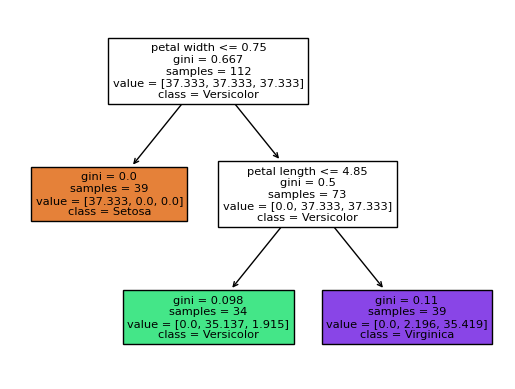

In [6]:
fn=['sepal length','sepal width','petal length','petal width']
cn=['Setosa','Versicolor','Virginica']
tree.plot_tree(clf,filled=True,class_names=cn,feature_names=fn)

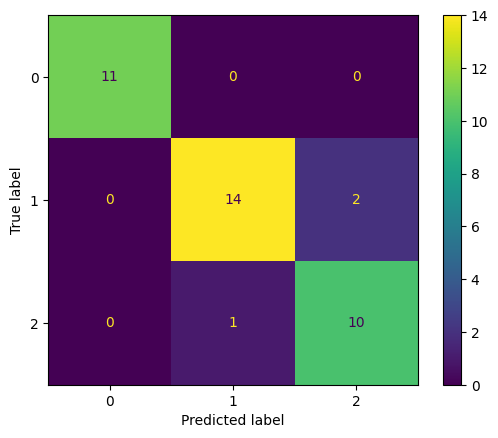

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

<Axes: >

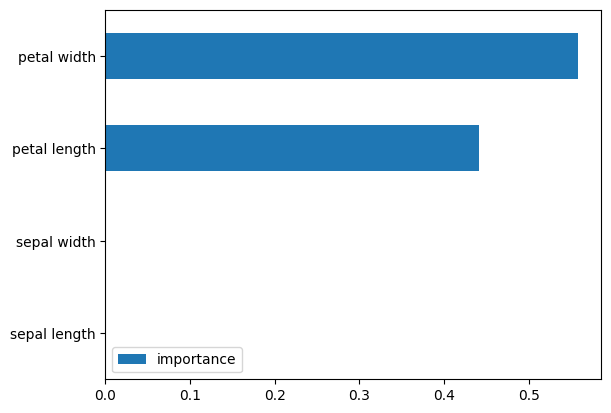

In [8]:
importances_df = pd.DataFrame(clf.feature_importances_,index=fn,columns=['importance'])
importances_df.sort_values(by='importance').plot(kind='barh')